## Assignment 1 
### \<Zuxing Wu> \<a1816653>

### 1. Reading datasets

In [277]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import seaborn as sns

# 0. Load dataset
data = pd.read_json('random_30000_hotel_reviews.JSON', lines=True)
data.head(5)

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False


In [278]:
data['ratings'][3]
# show me the structure of ratings

{'service': 3.0,
 'cleanliness': 2.0,
 'overall': 2.0,
 'value': 1.0,
 'location': 4.0,
 'sleep_quality': 1.0,
 'rooms': 1.0}

I need to extract the value of '**overall**' field

In [279]:
print(data['ratings'][0]['overall'])
print(data['ratings'][1]['overall'])
print(data['ratings'][2]['overall'])
print(data['ratings'][3]['overall'])
print(data['ratings'][4]['overall'])

1.0
1.0
4.0
2.0
1.0


In [280]:
# 1. title + text = review
data['review'] = data['title'] + " " + data['text']
data['overall'] = data['ratings'].apply(lambda x: x['overall'])
# print(data.columns)

# 2. keep 'review', 'overall' only
data = data[['review', 'overall']]
# print(data.columns)
data.head(10)

,review,overall
0,“Horrible experience” First of all we got ther...,1.0
1,“Stay Away” Found Racist graffiti in the room....,1.0
2,“Great location and service” Close to Union Sq...,4.0
3,“I will never go back here again!” I had a bad...,2.0
4,“Ripped off our VISA card after departure” Aft...,1.0
5,"“A great location!” Steps to Grand Central, a ...",4.0
6,“It's all about the Location” This Hotel is lo...,3.0
7,“Five Star Service” I stayed with my teenage b...,5.0
8,“Good airport hotel in Seattle” Very good airp...,4.0
9,“Grand Union Hotel” Just returned from a great...,3.0


In [281]:
data['review'][6]
# rating is 3.0, looks like positive

"“It's all about the Location” This Hotel is located right in the heart of San Francisco a block away from Union Square. \nThere is a Starbucks coffee shop attached to the hotel which was a definite plus and Cable car service right at the front door. \nYou must remember that this hotel was built in the 1930’s and thus some things are not as “up to date” as one would like. It definitely needs some updating but has a lot of charm and very friendly staff. We were there to see the city – not sit in our room and stare at the walls.\nBe prepared that no matter where you stay in down town, you will hear sirens from the street and of course the bells from the cable cars but you get used to it after a couple of days – its part of San Francisco. \nThe worst part was getting our room, we had booked a king size bed but when we got to our room found a queen bed – in an adjoining room which would have been fine except we could hear the conversation of the couple in the next room as clear as if they 

In [282]:
data['review'][9]
# rating is 3.0, looks like positive too

"“Grand Union Hotel” Just returned from a great trip to New York,We stayed at the Grand Union Hotel under the shadow of the Empire state building and literally minutes from Times Sq,Macys ,MSG,5th Ave.A perfect location . The rooms are quite small but very clean with new bathrooms and free TV .Our original room overlooked the street outside but became very cold when the temp outside only peaked at 26 degrees!!We spoke to reception who couldnt be nicer and immediately moved us to a new room which was like a sauna!Heaven! I'd wouldnt hesitate to stay at the grand union again but would wait until the weather warmed up a bit on the streets,As for New Yorkers there warm hearted enough anyway,and just add to the experience!"

#### I guess **positive**(overall≥3.0), **negative**(overall<3.0)

In [283]:
import warnings
# ignore annoying warnings
warnings.filterwarnings('ignore')

# 3. split data into: train 10000 | dev 10000 | test 10000
train_data = data.iloc[:10000]
dev_data = data.iloc[10000:20000]
test_data = data.iloc[20000:]

# 4. remove all non-alphanumeric characters, lowercasing and tokenise the text
#    punctuations removed from here
dev_data['review'] = dev_data['review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x).lower()).apply(lambda x: word_tokenize(x)).to_frame()

### 2. Exploratory Data Analysis (EDA)

In [284]:
dev_data.shape
# 10000 rows, 2 column

(10000, 2)

In [285]:
# see first 10 rows
dev_data.head(10)

,review,overall
10000,"[nice, hotel, great, location, this, was, a, n...",4.0
10001,"[perfect, location, and, the, room, was, gener...",4.0
10002,"[rude, staff, extra, charges, overall, unimpre...",2.0
10003,"[great, location, would, stay, here, again, st...",4.0
10004,"[disappointed, in, chicago, i, stayed, at, the...",3.0
10005,"[great, choice, my, family, and, i, stayed, at...",5.0
10006,"[loved, the, swissotel, i, stayed, here, back,...",5.0
10007,"[great, hotel, pricey, but, perfect, i, travel...",5.0
10008,"[a, great, parksleepfly, hotel, my, husband, a...",5.0
10009,"[badly, needs, major, renovations, the, hotel,...",2.0


In [286]:
import random

index = random.randint(10000, 10000+10000)
index

19551

create a random index in order to peek a random review

In [287]:
# print(dev_data[index])
sample = dev_data['review'][index]
sample

['very',
 'clean',
 'and',
 'comfortable',
 'too',
 'i',
 'stayed',
 'at',
 'the',
 'cm',
 'cherry',
 'creek',
 'in',
 'denver',
 'for',
 '4',
 'days',
 'while',
 'travelling',
 'on',
 'business',
 'the',
 'front',
 'desk',
 'staff',
 'is',
 'very',
 'polite',
 'and',
 'professional',
 'there',
 'is',
 'no',
 'outside',
 'access',
 'to',
 'your',
 'rooms',
 'you',
 'must',
 'pass',
 'through',
 'the',
 'main',
 'lobby',
 'to',
 'get',
 'to',
 'the',
 'elevators',
 'the',
 'hotel',
 'is',
 '100',
 'nonsmoking',
 'and',
 'does',
 'not',
 'alllow',
 'pets',
 'my',
 'room',
 'had',
 'a',
 'microwave',
 'a',
 'refrigerator',
 'iron',
 'ironing',
 'board',
 'hair',
 'dryer',
 'queen',
 'bed',
 'a',
 'wardrobe',
 'for',
 'clothes',
 'a',
 'nice',
 'desk',
 'with',
 'plenty',
 'of',
 'plugs',
 'and',
 'lamps',
 'a',
 'sofa',
 'with',
 'living',
 'room',
 'table',
 'and',
 'a',
 'flat',
 'screen',
 'tv',
 'oh',
 'the',
 'alarm',
 'clocks',
 'even',
 'have',
 'the',
 'ability',
 'to',
 'hook',
 

In [288]:
# Are there empty values?
dev_data.isnull().sum()/len(dev_data)

review     0.0
overall    0.0
dtype: float64

Good. No empty values.

In [289]:
dev_data.head

<bound method NDFrame.head of                                                   review  overall
10000  [nice, hotel, great, location, this, was, a, n...      4.0
10001  [perfect, location, and, the, room, was, gener...      4.0
10002  [rude, staff, extra, charges, overall, unimpre...      2.0
10003  [great, location, would, stay, here, again, st...      4.0
10004  [disappointed, in, chicago, i, stayed, at, the...      3.0
...                                                  ...      ...
19995  [excellent, hotel, one, of, the, best, hotels,...      5.0
19996  [my, 4th, stay, and, i, love, it, the, locatio...      4.0
19997  [amazing, we, booked, the, day, before, we, le...      5.0
19998  [hotwire, find, very, nice, accommodation, tha...      4.0
19999  [good, location, my, husband, and, i, were, th...      4.0

[10000 rows x 2 columns]>

In [290]:
# get rid of stopwords so that program run faster + lemmatisation
from nltk.corpus import stopwords
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))-{'not', 'no', 'nor', 'neither', 'never', 'none'}|{'hotel', 'room'}

def clean_text(text):
    # remove stopwords
    tokens = [word for word in text if word.lower() not in stop_words]
    
    # lemmatization took too much time! (over 3 minutes) I don't need it.
    # Lemmatize the tokens
    # text = ' '.join(tokens)
    # doc = nlp(text)
    # tokens =  [token.lemma_ for token in doc]

    return tokens
    
dev_data['review'] = dev_data['review'].apply(clean_text)

In [291]:
dev_data.head(5)

,review,overall
10000,"[nice, great, location, nice, price, got, last...",4.0
10001,"[perfect, location, generous, size, stayed, de...",4.0
10002,"[rude, staff, extra, charges, overall, unimpre...",2.0
10003,"[great, location, would, stay, stayed, 3, nigh...",4.0
10004,"[disappointed, chicago, stayed, allerton, nigh...",3.0


Here, I removed negation words from stopwords because I asked ChatGPT and its answer is:
> **In sentiment analysis tasks, the presence of "not" can often reverse the sentiment of a sentence. For example, "I am happy" has a positive sentiment, but "I am not happy" has a negative sentiment.**  

So I shouldn't remove them. Differently, I add **'hotel', 'room(s)'** into it because its frequence is the highest based on word frequence plot. We don't need them, seriously.

In [292]:
# join tokens as a sentence
dev_data['review'] = dev_data['review'].apply(lambda x: ' '.join(word for word in x))

In [293]:
dev_data.head()

,review,overall
10000,nice great location nice price got last minute...,4.0
10001,perfect location generous size stayed december...,4.0
10002,rude staff extra charges overall unimpressive ...,2.0
10003,great location would stay stayed 3 nights larg...,4.0
10004,disappointed chicago stayed allerton night aug...,3.0


#### distribution of "overall" rating

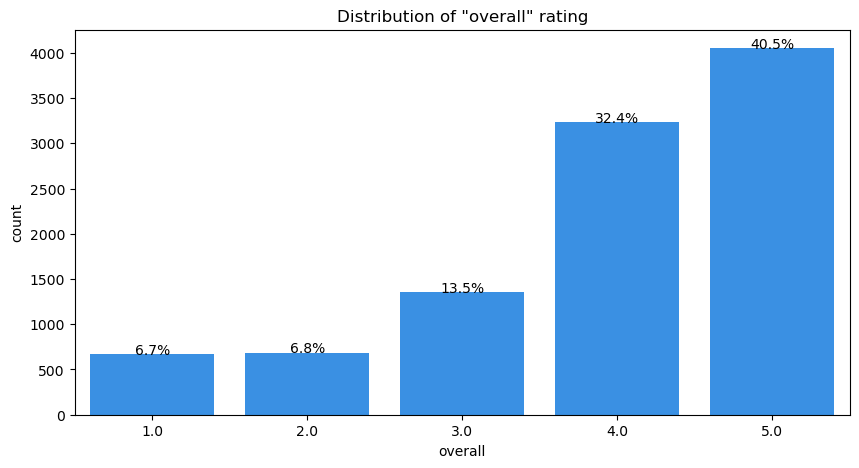

In [294]:
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
total = float(len(dev_data))
ax = sns.countplot(x="overall", data=dev_data, color='DodgerBlue')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of "overall" rating')
plt.show()

We can see most ratings are positive(72.9%) with high scores. Now, facing this countplot, I guess :  
overall=**1.0** and **2.0** are **negative**, overall=**4.0** and **5.0** are **positive**,  
overall=**3.0** could be a mixture of **negative, neutural**, and **positive**. I may need to seperate them correctly.

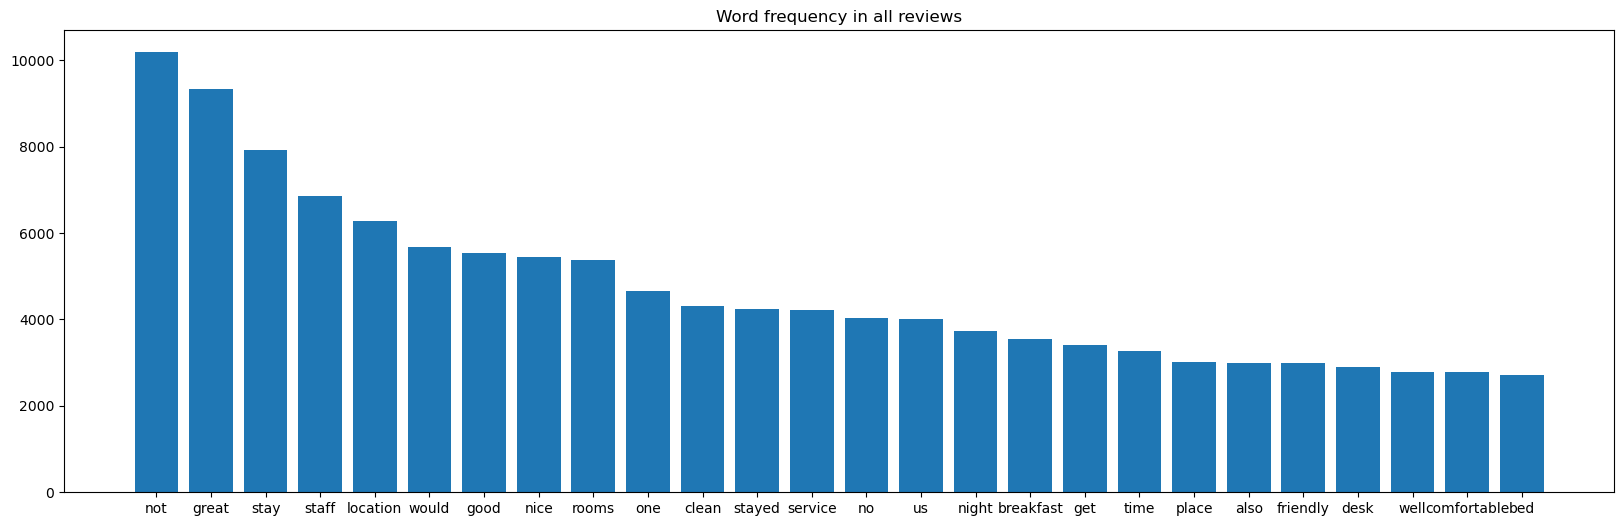

In [295]:
# Word frequency plots are used to visualize the most common words in a dataset.

text = ' '.join(dev_data['review'])
tokens = word_tokenize(text)

word_freq = dict(Counter(tokens).most_common(26))

plt.figure(figsize=(20,6))
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word frequency in all reviews')
plt.show()

Most mentioned entities(aspects) are: **staff, location, service, breakfast, desk, bed**.  
Most mentioned adjectives are: **great, good, nice, clean, friendly, well, comfortable**.  
HOWEVER, definitely positve comments accounts for 72.9%, which means the data is imbalanced.

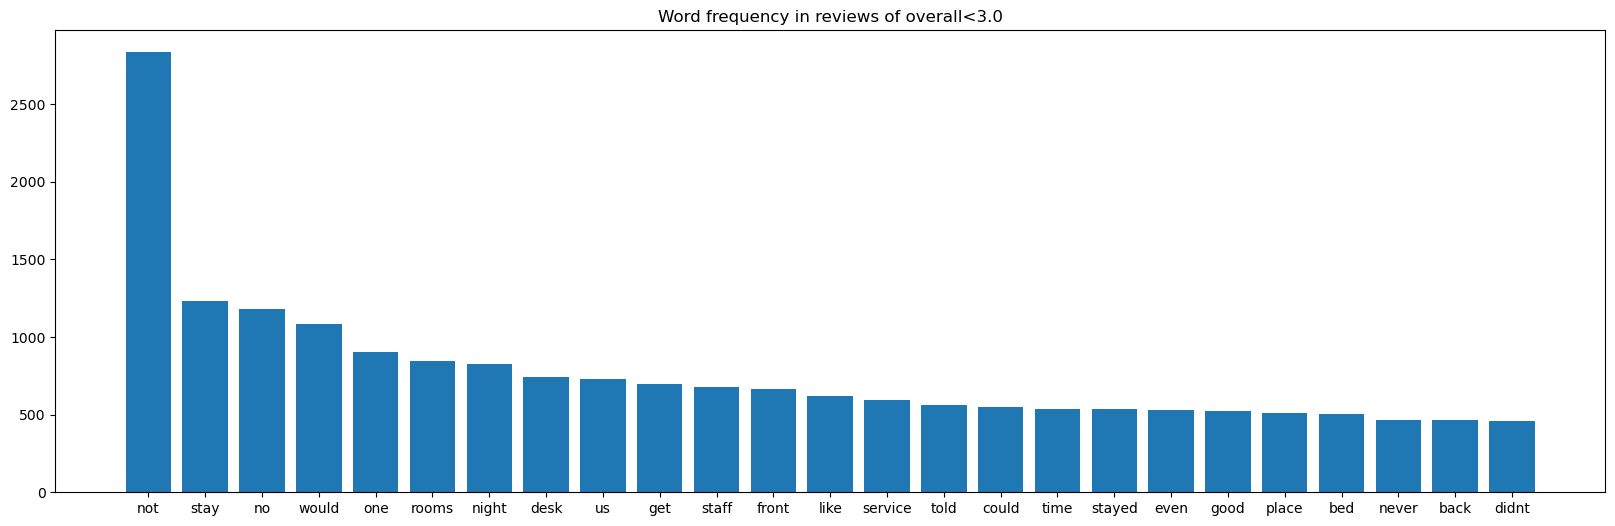

In [296]:
# reviews of overall< 3.0
text = ' '.join(dev_data[dev_data['overall']< 3.0]['review'])
tokens = word_tokenize(text)

word_freq = dict(Counter(tokens).most_common(25))

plt.figure(figsize=(20,6))
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word frequency in reviews of overall<3.0')
plt.show()

We can see some predictive words that make a negative review:  
**not, no, never, didnt**

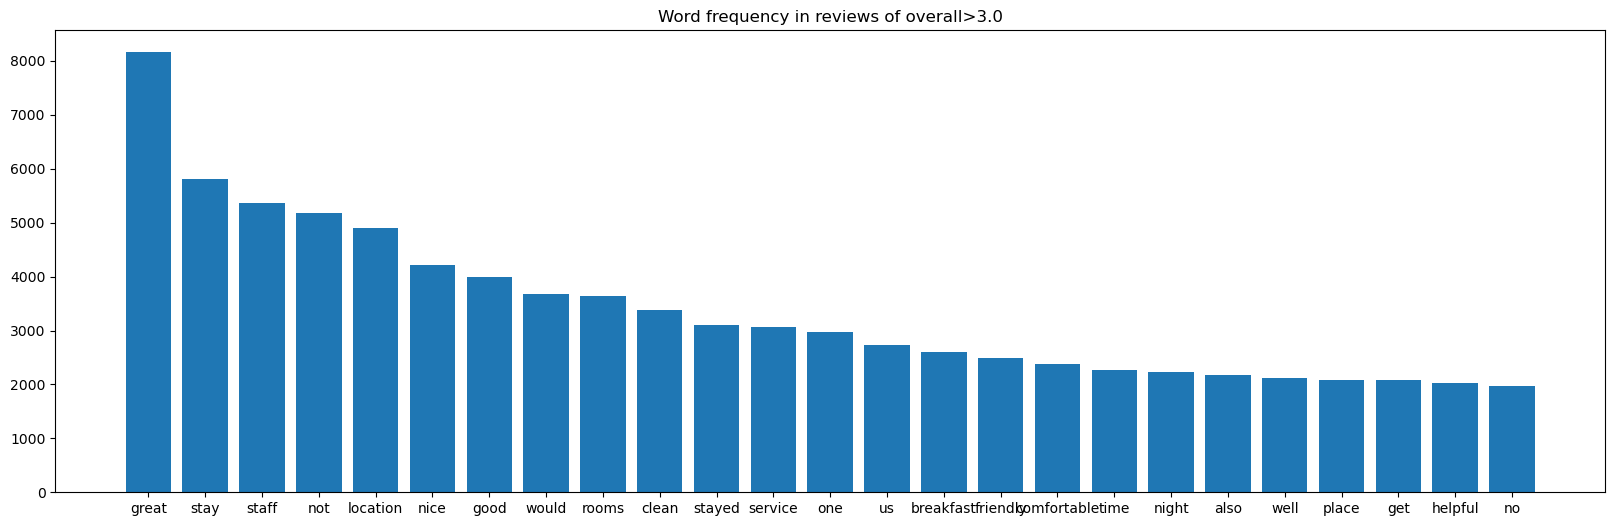

In [297]:
# reviews of overall> 3.0
text = ' '.join(dev_data[dev_data['overall']> 3.0]['review'])
tokens = word_tokenize(text)

word_freq = dict(Counter(tokens).most_common(25))

plt.figure(figsize=(20,6))
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word frequency in reviews of overall>3.0')
plt.show()

We can see some predictive words that make a positive review:  
**great, nice, good, clean, friendly, comfortable, well, helpful**

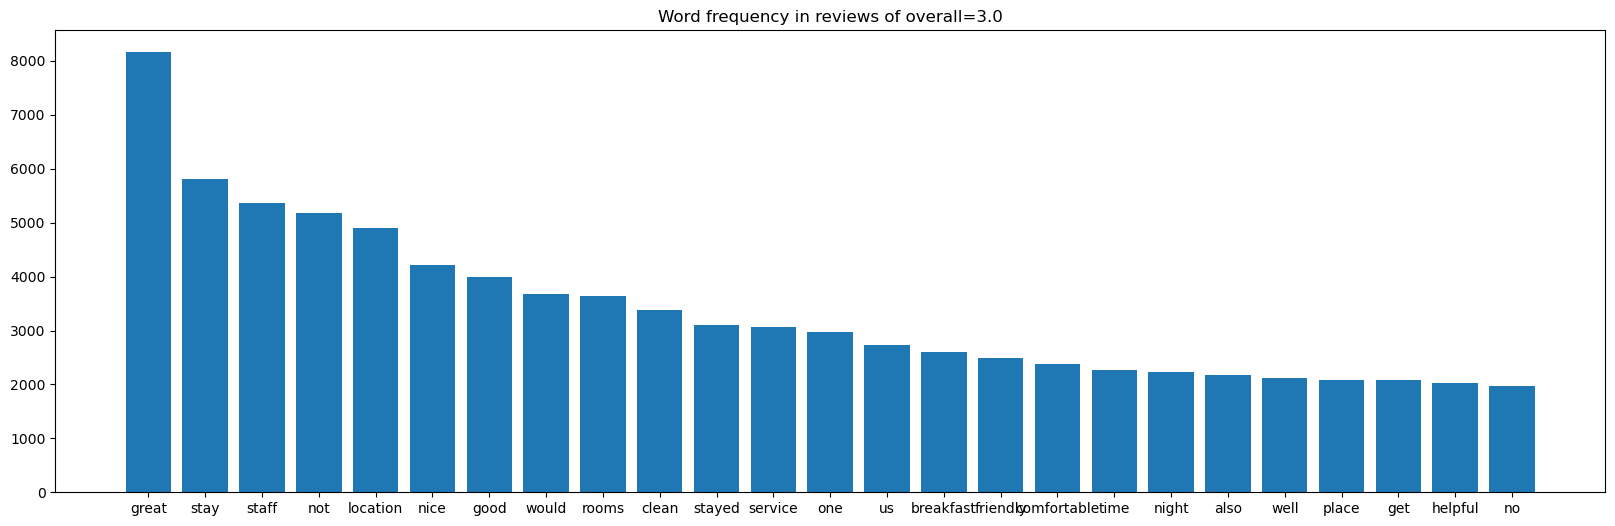

In [298]:
# reviews of overall= 3.0
text = ' '.join(dev_data[dev_data['overall']> 3.0]['review'])
tokens = word_tokenize(text)

word_freq = dict(Counter(tokens).most_common(25))

plt.figure(figsize=(20,6))
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word frequency in reviews of overall=3.0')
plt.show()

I thought in the range of overall=3.0, reviews would be much neutural, but it shows so many positive words appeared here.  
I had better discard this range to better distinguish negative from positive.

Distribution of 3-grams:
within walking distance: 377
staff friendly helpful: 283
front desk staff: 274
would definitely stay: 260
great place stay: 167
would highly recommend: 134
flat screen tv: 118
empire state building: 111
great location great: 106
stayed one night: 102
new york city: 85
right across street: 84
would definitely recommend: 82
stay great location: 78
would recommend anyone: 77
great location stayed: 71
stayed 3 nights: 68
staff helpful friendly: 66
stayed two nights: 65
easy walking distance: 63


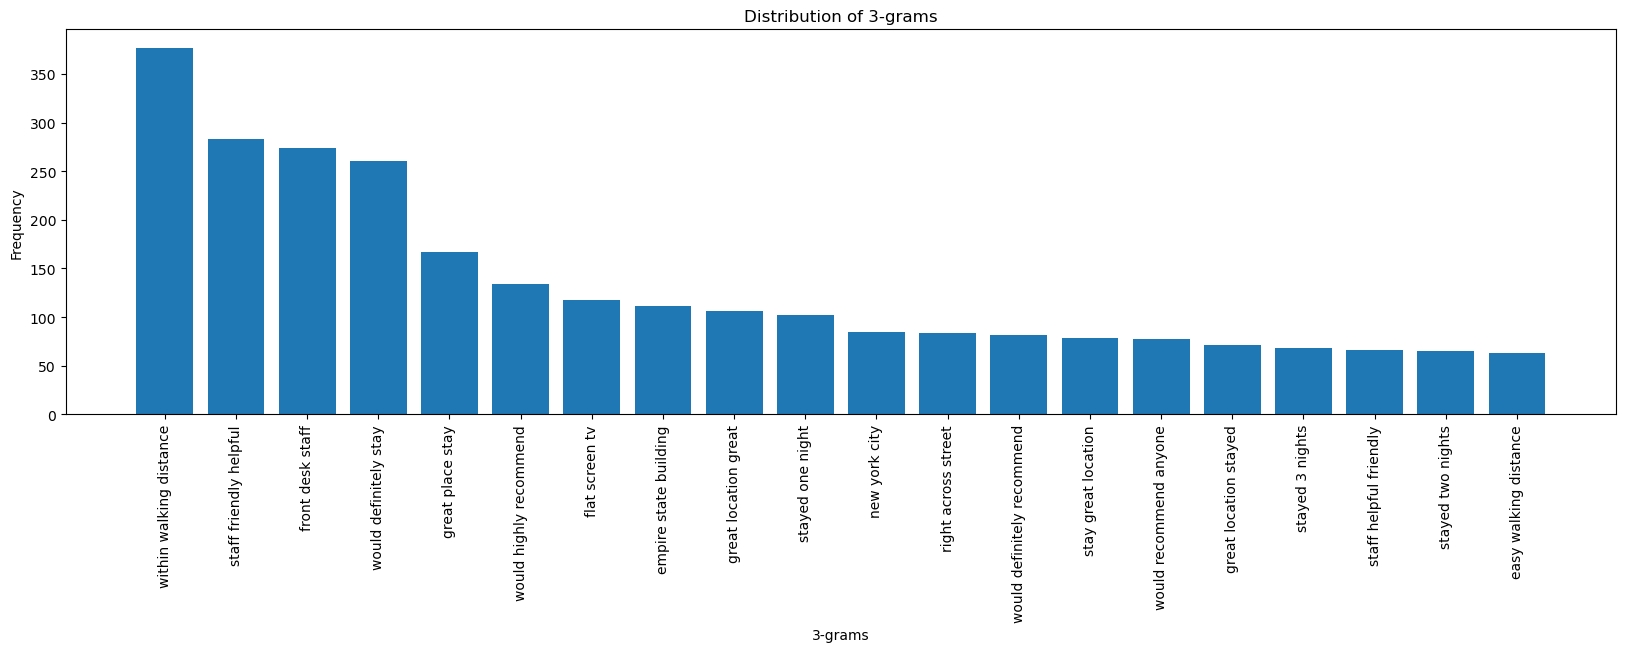

In [299]:
# Identifying common N-grams: N-grams are sequences of words. Identifying common n-grams can give insight into the most common phrases in the dataset.

from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the value of n for n-grams
n_value = 3  # You can change this value to see different n-grams, e.g., 2 for bigrams, 3 for trigrams, etc.

# Generate n-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the occurrences of each n-gram
ngrams_count = dict(Counter(ngrams_list).most_common(20))

# Display the distribution
print(f"Distribution of {n_value}-grams:")
for ngram, count in ngrams_count.items():
    print(f"{ngram}: {count}")

# Plot the distribution
labels, values = zip(*ngrams_count.items())
indexes = range(len(labels))

plt.figure(figsize=(20,5))
plt.bar(indexes, values)
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.xticks(indexes, labels, rotation='vertical')
plt.title(f'Distribution of {n_value}-grams')
plt.show()

So, we can see most customers really care the **location/distance, staff/front desk**.  
They are also willing to recommend this hotel to others.

#### number of unique words

In [300]:
# Bag-of-Words: Bag-of-Words (BoW) is a representation of text as a bag (multiset) of its words, disregarding grammar 
# and even word order but keeping multiplicity. 
# It is one of the most common feature engineering techniques used in NLP.

from sklearn.feature_extraction.text import CountVectorizer

corpus = dev_data['review']

vectorizer = CountVectorizer()
# Fit and transform the corpus
bow = vectorizer.fit_transform(corpus)
# Get the vocabulary (unique words)
vocab = vectorizer.get_feature_names_out()
print(vocab)
print(f"Number of unique words: {vocab.size}") # 32573

['000' '0030' '01' ... 'zoos' 'zro' 'zucchini']
Number of unique words: 32573


#### check sentiment for dev_data

In [301]:
dev_data.head(10)
# peek the data format and structure. too lazy to scroll up

,review,overall
10000,nice great location nice price got last minute...,4.0
10001,perfect location generous size stayed december...,4.0
10002,rude staff extra charges overall unimpressive ...,2.0
10003,great location would stay stayed 3 nights larg...,4.0
10004,disappointed chicago stayed allerton night aug...,3.0
10005,great choice family stayed pearl may 2428 well...,5.0
10006,loved swissotel stayed back november 2004 serv...,5.0
10007,great pricey perfect travel 50 days per year s...,5.0
10008,great parksleepfly husband chose parksleepfly ...,5.0
10009,badly needs major renovations badly need major...,2.0


The 10002, 10009 reviews seem negative. Is it the same as VADER?

In [302]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('not')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Why is 'not' classified into **neutural**? Ok, I read the code from example.py. I saw:

    "if score['pos'] > score['neg'] :
        print(text+": "+"VADER positive")
    else:
        print(text+": "+"VADER negative")"
By handling like this, I can put 'not' into **negative**

In [303]:
# a piece of review with overall = 2.0
text = dev_data['review'][10002]
print(text)
print(sia.polarity_scores(text))

rude staff extra charges overall unimpressive traveled big group wedding weekend 16th immediately upon checkin man front desk lazy uninterested every little question regarding reservation seemed bother woman rude looked us like scum horrible booked nonsmoking coaxing got move us joey nice later problems overcharging like completely different person definitely not good way good clean bar staff much fun spent lot time manager great remembered us joked us truly nice experience buzz bartender sweet also left card never closed tab yikes no problem mailing way colorado even saw woman front desk go bar shift drinks seemed capable kindness spared none us guests nice overrall seemed little sad really enjoyed 8ft deep pool hot tub got home however charged us 2 rooms even though stayed one 6 mysterious 100 dollar charges front desk people still havent figured wasnt bar staff would rate place terrible
{'neg': 0.211, 'neu': 0.565, 'pos': 0.224, 'compound': 0.6677}


P(neutural)= 0.565，it's more likely neutural according to VADER. While the compound score shows it's positive. Personally I doubt this result.
Then I found the raw review of this row, and analysis it again.

In [304]:
# a piece of review with overall = 2.0
text = "Rude staff, extra charges, overall unimpressive We traveled here with a big group for a wedding the weekend of the 16th. Immediately upon check-in the man at the front desk was lazy, uninterested and every little question regarding the reservation seemed to bother him. The woman was SO rude. She looked at us like we were scum, it was horrible. We had been booked into a non-smoking room and after some coaxing we got him to move us. Joey was nice but later when we had problems with overcharging it was like a completely different person. Definitely not in a good way. \nGood: The room was clean and the bar staff was SO much fun. We spent a lot of time in there and the manager was so great. He remembered us and joked with us, that was a truly nice experience. Buzz the bartender is so sweet also. I left my card there (never closed my tab! Yikes!) and they had no problem mailing it to me ALL the way in Colorado). I even saw the woman from Front Desk go into the bar after her shift for a few drinks and she seemed very capable of kindness then but spared none for us guests.\nThe hotel is nice overrall but seemed a little sad. Really enjoyed the 8ft deep pool and hot tub. When we got home however, they had charged us for 2 rooms even though we only stayed in one and there were 6 other mysterious 100+ dollar charges which the Front Desk people still haven't been figured out. If it wasn't for the bar and it's staff, I would rate this place as Terrible"
sia.polarity_scores(text)

{'neg': 0.116, 'neu': 0.693, 'pos': 0.191, 'compound': 0.9874}

The reason of this might be: somebody gave a generally positive review while gave a negative overall rating: overall = 2.0 or 1.0. And also, 'pos'>'neg' here.  
BUT, after double check, I found the positve part of this review is about the bar and satff. As the customer said(the last sentence):

    >If it wasn't for the bar and it's staff, I would rate this place as Terrible.  
Therefore it is positive.  
Check agnain. Is it positive? I feel the customer wanted to say this place is not terrible thanks to its bar and staff, but it is seriously bad.

In [305]:
# a piece of review with overall = 2.0
text = dev_data['review'][10009]
print(text)
print(sia.polarity_scores(text))

badly needs major renovations badly need major renovation carpet indeed threadbare furniture appliances old outdated carpet dirty noisy location well bell staff friendly helpful despite would not stay
{'neg': 0.271, 'neu': 0.526, 'pos': 0.203, 'compound': -0.4019}


The compound score shows this is negative. Then, I found the raw text of it:  

    "The hotel is badly in need of a major renovation. The carpet in my room was indeed threadbare and the furniture and appliances are old and outdated. The carpet in the room was dirty. It is in a very noisy location as well. The bell staff was very friendly and helpful. Despite this I would not stay here again."
It's negative indeed.

In [306]:
# a piece of review with overall = 3.0
text = dev_data['review'][10004]
print(text)
print(sia.polarity_scores(text))

disappointed chicago stayed allerton night august 8 lived chicago looking forward stay historic somewhat disappointed size although older hotels smaller rooms bathroom sheer curtain window bit surprised elevators five slow seemed take long time catch elevator going worst part traffic huron entrance huron not michigan took 45 minutes get car valet 1115 also large hospital ambulances going hours location excellent saves would not stay
{'neg': 0.139, 'neu': 0.785, 'pos': 0.076, 'compound': -0.6908}


I think I should discard all samples that are overall=3.0. As I guessed before, this type is ambiguous.  
Reviews in this type can be negative, netural and positive.

### 3. Preprocessing

In [307]:
import numpy as np

np.unique(dev_data['overall'])
# 1.0 ~ 5.0

array([1., 2., 3., 4., 5.])

In [308]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 10000 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   review   10000 non-null  object 
 1   overall  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [309]:
# pick overall<3.0 data as negative, overall>3.0 data as positive from dev_data
dev_data_final = dev_data[dev_data['overall']!=3.0]
dev_data_final['sentiment'] = np.where(dev_data_final['overall'] < 3.0, 0, 1)

dev_data_final.groupby('sentiment').size()

sentiment
0    1356
1    7291
dtype: int64

Now, 8647 rows left(1356 negative, 7291 positive, imbalanced)

In [310]:
# devided dev_data into train, test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Split the data into train 70% and test sets 30%
X_train, X_test, y_train, y_test = train_test_split(dev_data_final["review"], dev_data_final["sentiment"], test_size=0.3, random_state=42)

# Vectorize the text using TF-IDF default parameters
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer(lowercase=True, token_pattern='[a-zA-Z0-9@#$%_]{2,}', max_features=None)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### 4. Selecting supervised method for sentiment classification

In [311]:
# Train a LinearRegression classifier
lr = LinearRegression()
lr_accuracy = cross_val_score(lr, X_train, y_train, cv=10)
lr.fit(X_train, y_train)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_accuracy = cross_val_score(rf, X_train, y_train, cv=10)
rf.fit(X_train, y_train)

# Train a Multinomial Naive Bayes classifier default parameters
mnb = MultinomialNB()
mnb_accuracy = cross_val_score(mnb, X_train, y_train, cv=10)
mnb.fit(X_train, y_train)

# Train a SVM classifier kernel and C=1
svm = SVC(kernel="linear", C=1)
svm_accuracy = cross_val_score(svm, X_train, y_train, cv=10)
svm.fit(X_train, y_train)

# Train a K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_accuracy = cross_val_score(knn, X_train, y_train, cv=10)
knn.fit(X_train, y_train)

# Train a Multilayer Perceptron (MLP) classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_accuracy = cross_val_score(mlp, X_train, y_train, cv=10)
mlp.fit(X_train, y_train)

# Evaluate the models on the test set
# y_pred_mnb = mnb.predict(X_test)
# y_pred_svm = svm.predict(X_test)

print("LinearRegression:")
print("Accuracy:", np.mean(lr_accuracy))
print("Test score:", lr.score(X_test, y_test))
print('----------------------------------------------')
print("Random Forest:")
print("Accuracy:", np.mean(rf_accuracy))
print("Test score:", rf.score(X_test, y_test))
print('----------------------------------------------')
print("Multinomial Naive Bayes:")
print("Accuracy:", np.mean(mnb_accuracy))
print("Test score:", mnb.score(X_test, y_test))
print('----------------------------------------------')
print("SVM:")
print("Accuracy:", np.mean(svm_accuracy))
print("Test score:", svm.score(X_test, y_test))
# print('----------------------------------------------')
# print("k-NN:")
# print("Accuracy:", np.mean(knn_accuracy))
# print("Test score:", knn.score(X_test, y_test))
# print('----------------------------------------------')
# print("MLP:")
# print("Accuracy:", np.mean(mlp_accuracy))
# print("Test score:", mlp.score(X_test, y_test))

# I commented k-NN,MLP because it takes me too long to get their scores, more than 10mins

LinearRegression:
Accuracy: 0.4713429924574866
Test score: 0.4217572681488183
----------------------------------------------
Random Forest:
Accuracy: 0.8907822600441861
Test score: 0.9017341040462428
----------------------------------------------
Multinomial Naive Bayes:
Accuracy: 0.8408788151542428
Test score: 0.8524084778420039
----------------------------------------------
SVM:
Accuracy: 0.9553877205902408
Test score: 0.9595375722543352


SVM:  
Accuracy: 0.9553877205902408  
Test score: 0.9595375722543352  
Seems **SVM** is a little bit better than others.

In [312]:
best_estimator = svm

### 5. Sentiment classification using VADER lexicon and method

In [313]:
dev_data.head(10)

,review,overall
10000,nice great location nice price got last minute...,4.0
10001,perfect location generous size stayed december...,4.0
10002,rude staff extra charges overall unimpressive ...,2.0
10003,great location would stay stayed 3 nights larg...,4.0
10004,disappointed chicago stayed allerton night aug...,3.0
10005,great choice family stayed pearl may 2428 well...,5.0
10006,loved swissotel stayed back november 2004 serv...,5.0
10007,great pricey perfect travel 50 days per year s...,5.0
10008,great parksleepfly husband chose parksleepfly ...,5.0
10009,badly needs major renovations badly need major...,2.0


In [314]:
# define a function for sentiment prediction using VADER lexicon
def vader_predict(text):
    score = sia.polarity_scores(text)
    if score['pos'] > score['neg']:
        return 1
    else:
        return 0

dev_data['vader_prediction'] = dev_data['review'].apply(vader_predict)
dev_data.head(10)

,review,overall,vader_prediction
10000,nice great location nice price got last minute...,4.0,1
10001,perfect location generous size stayed december...,4.0,1
10002,rude staff extra charges overall unimpressive ...,2.0,1
10003,great location would stay stayed 3 nights larg...,4.0,1
10004,disappointed chicago stayed allerton night aug...,3.0,0
10005,great choice family stayed pearl may 2428 well...,5.0,1
10006,loved swissotel stayed back november 2004 serv...,5.0,1
10007,great pricey perfect travel 50 days per year s...,5.0,1
10008,great parksleepfly husband chose parksleepfly ...,5.0,1
10009,badly needs major renovations badly need major...,2.0,0


Oh, only the 10002 one is dfferent from VADER's result in first 10 rows.

In [315]:
# compare results of VADER and my best estimator
# all dev_data, including overall=3.0
x_dev_data = vectorizer.transform(dev_data["review"])
y_predict = best_estimator.predict(x_dev_data)
y_vader = dev_data['vader_prediction']

print(f"My model predicted: {len(y_predict)}")
print(f"VADER predicted: {len(y_vader)}")
print(f"My model similarity rate compared with VADER: {sum(y_predict==y_vader)/len(y_vader)}")

My model predicted: 10000
VADER predicted: 10000
My model similarity rate compared with VADER: 0.901


Looks good. The reason of the slight difference: The trainnning sample cannot be the same as VADER.  
Some customers wrote a negative review and gave a high overall score.  
Some customers wrote a positive review and gave a low overall score.  
It's a subjective thing.

### 6. Combining VADER with the best classifier

I think VADER is good enough as a standard for calibrating my model. Before trainning, I just treat data using this strategy: negative(overall<3.0), postive(overall>3.0), which means I didn't make use of the middle part(overall=3.0).  
Now, I need to ajust some samples sentiment value based on VADER's. This time I use all data in dev_data.  
I might as well use VADER's sentiment values for training!

In [316]:
# all review data + VADER's sentiment values
dev_data_final = dev_data
# Split the data into train 70% and test sets 30%
X_train, X_test, y_train, y_test = train_test_split(dev_data_final["review"], dev_data_final["vader_prediction"], test_size=0.3, random_state=42)

# Vectorize the text using TF-IDF default parameters
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer(lowercase=True, token_pattern='[a-zA-Z0-9@#$%_]{2,}', max_features=None)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a best_estimator classifier
svm_accuracy = cross_val_score(best_estimator, X_train, y_train, cv=10)
best_estimator.fit(X_train, y_train)

print("Best_estimator:")
print("Accuracy:", np.mean(svm_accuracy))
print("Test score:", best_estimator.score(X_test, y_test))

Best_estimator:
Accuracy: 0.9301428571428572
Test score: 0.9253333333333333


In [317]:
# comapre new model's result with VADER
x_dev_data = vectorizer.transform(dev_data["review"])
y_predict = best_estimator.predict(x_dev_data)

print(f"My model predicted: {len(y_predict)}")
print(f"VADER predicted: {len(y_vader)}")
print(f"My model similarity rate compared with VADER: {sum(y_predict==y_vader)/len(y_vader)}")

My model predicted: 10000
VADER predicted: 10000
My model similarity rate compared with VADER: 0.9671


Previous similarity rate is: 0.901. Now it has been improved to 0.9671. Good.

In [318]:
# check a random review and its sentiment prediction by my model
index = random.randint(0, 10000)

print(dev_data['review'][index+10000])
print('positive' if y_predict[index]==1 else 'negative')


great price dc within walking distance national mall great place clean nice staff site restaurant good well typically dont like restaurants try avoid went time short time didnt want go far nice little mile id say white house little national mall
positive


### 7. Trainig and testing the final method

#### To preprocess the training/test sets

In [319]:
# 4. remove all non-alphanumeric characters, lowercasing and tokenise the text
#    punctuations removed from here
train_data['review'] = train_data['review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x).lower()).apply(lambda x: word_tokenize(x)).to_frame()
test_data['review'] = test_data['review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x).lower()).apply(lambda x: word_tokenize(x)).to_frame()

In [320]:
# Are there empty values?
print('train_data:')
print(train_data.isnull().sum()/len(train_data))
print('test_data:')
print(test_data.isnull().sum()/len(test_data))

train_data:
review     0.0
overall    0.0
dtype: float64
test_data:
review     0.0
overall    0.0
dtype: float64


In [321]:
# clean and transform reviews
train_data['review'] = train_data['review'].apply(clean_text).apply(lambda x: ' '.join(word for word in x))

test_data['review'] = test_data['review'].apply(clean_text).apply(lambda x: ' '.join(word for word in x))

In [322]:
train_data.head(5)

,review,overall
0,horrible experience first got didnt booked not...,1.0
1,stay away found racist graffiti request change...,1.0
2,great location service close union square bit ...,4.0
3,never go back bad vibe place moment walked mai...,2.0
4,ripped visa card departure received final bill...,1.0


In [323]:
test_data.head(5)

,review,overall
20000,great stay comfortable downsides even though d...,4.0
20001,nice place really nice 2 br2 bath suite great ...,5.0
20002,tip top new york number occasions im fairly kn...,4.0
20003,great locationrough sleep price location one b...,4.0
20004,compact cool midtown read mainly positive revi...,4.0


In [324]:
print(np.unique(train_data['overall']))
print(np.unique(test_data['overall']))

[1. 2. 3. 4. 5.]
[0. 1. 2. 3. 4. 5.]


Why is there 0 in test_data? How many are there 0.0 score ratings?

In [325]:
print(test_data[test_data['overall']==0.0]['review'].count())
print(test_data[test_data['overall']==0.0]['review'][29960])
# 29960 is its ID

1
perfect location large stayed two weeks best location right pier 39 lots things around area restaurants sight seeing staff friendly great service come back


Only one zero score rating. Besides, it seems positive.

In [326]:
train_data['vader_prediction'] = train_data['review'].apply(vader_predict)
test_data['vader_prediction'] = test_data['review'].apply(vader_predict)

In [327]:
train_data.head()

,review,overall,vader_prediction
0,horrible experience first got didnt booked not...,1.0,0
1,stay away found racist graffiti request change...,1.0,0
2,great location service close union square bit ...,4.0,1
3,never go back bad vibe place moment walked mai...,2.0,1
4,ripped visa card departure received final bill...,1.0,1


The 3rd, 4th row looks wired.

In [328]:
print(data['review'][3])
print('--------------------------------------')
print(data['review'][4])

“I will never go back here again!” I had a bad vibe about this place from the moment I walked in. The main lobby had very dim lighting, probably to cover up the fatigue of the place. We paid for a King suite and were supposed to get a free upgrade to a deluxe king because I had clicked on a facebook link when I made the reservations on the hotel website. The first room we were given was very big but very bare as it was poorly furnished. The room had no view at all. When we complained they supposedly upgraded us to a street view room which was much smaller, and had a queen size bed, not a king as we had expected. Instead of complaining again we decided just to deal with it. My issues with the room were the following: the bed was right at the door to the room and there was only one nightstand. The television was at the far side of the room, too far for comfortable viewing. There were no comfortable chairs (just a desk chair). There was a wet spot on the rug which of course I only noticed

These two reviews can't be positive(overall=2.0, 1.0). Why does VADER think they are positve(1).

In [329]:
test_data.head()

,review,overall,vader_prediction
20000,great stay comfortable downsides even though d...,4.0,1
20001,nice place really nice 2 br2 bath suite great ...,5.0,1
20002,tip top new york number occasions im fairly kn...,4.0,1
20003,great locationrough sleep price location one b...,4.0,1
20004,compact cool midtown read mainly positive revi...,4.0,1


Seems ok.

In [330]:
X_train_data = train_data['review']
y_train_data = train_data['vader_prediction']
X_test_data = test_data['review']
y_test_data = test_data['vader_prediction']

# Vectorize the text using TF-IDF default parameters
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer(lowercase=True, token_pattern='[a-zA-Z0-9@#$%_]{2,}', max_features=None)
X_train_data = vectorizer.fit_transform(X_train_data)
X_test_data = vectorizer.transform(X_test_data)

svm_accuracy = cross_val_score(best_estimator, X_train_data, y_train_data, cv=10)
best_estimator.fit(X_train_data, y_train_data)
print("Best_estimator:")
print("Accuracy:", np.mean(svm_accuracy))
print("Test score:", best_estimator.score(X_test_data, y_test_data))

Best_estimator:
Accuracy: 0.9343999999999999
Test score: 0.9322


In [331]:
# comapre new model's result with VADER
# x_dev_data = vectorizer.transform(dev_data["review"])
y_predict_data = best_estimator.predict(X_test_data)

print(f"My model predicted: {len(y_predict_data)}")
print(f"VADER predicted: {len(y_test_data)}")
print(f"My model similarity rate compared with VADER: {sum(y_predict==y_test_data)/len(y_test_data)}")
# similarity rate=0.8043 not high, but acceptable

My model predicted: 10000
VADER predicted: 10000
My model similarity rate compared with VADER: 0.8403


### 8. Reviews aspect prediction

There could be some correlations between ratings of each aspects and reviews. We can use reviews to predict the rating score for a specific aspect. The fact is not every review mentioned every aspect about the hotel living experience. So, we can't use reviews that didn't mention service to train/test our model for service ratings prediction. We need to select informative and useful samples for train and test of the prediction model.  
We might need to train more than one models for these aspects' rating. Different aspects may fit in different models and thus have a relatively better prediction accuracy.

### 9. References